<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/Unsupervised%20Learning/51_KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/26-customer_data.csv')

In [4]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Income   1499 non-null   float64
 1   Spending_Score  1499 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


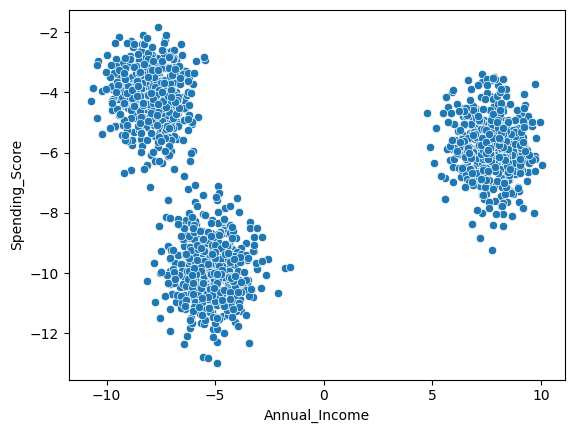

In [7]:
sns.scatterplot(data=df,x="Annual_Income",y="Spending_Score")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test = train_test_split(df,test_size=0.2,random_state=15)

In [11]:
X_test

,Annual_Income,Spending_Score
513,-5.172436,-11.041683
906,-7.281623,-4.334985
1366,-7.933360,-4.679263
367,7.247201,-4.157474
1392,-5.963997,-9.834777
...,...,...
879,-4.747040,-9.904793
722,-4.886108,-10.754440
557,7.764069,-4.766483
1230,-5.160849,-10.713683


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.cluster import KMeans

In [20]:
#elbow method
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k , init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)

In [21]:
wcss

[196.92068784710185,
 68.44836482219317,
 11.697030239519913,
 9.602360836697937,
 7.80912936438062,
 7.415086046638696,
 6.789816257767428,
 5.035261229833779,
 4.407196650294026,
 4.108158805034003]

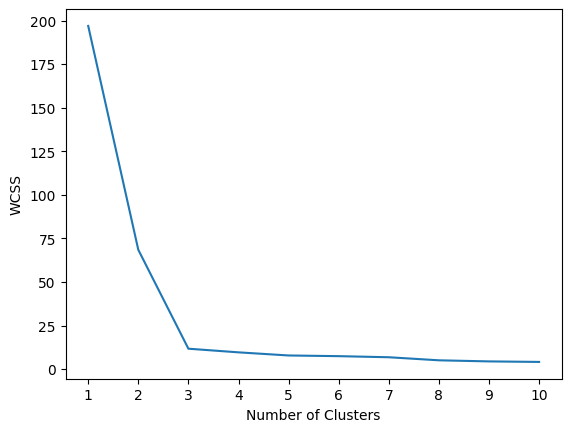

In [23]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

 # kmeans.inertia_ # wcss hesaplanmış hali

In [24]:
# ideal cluster sayısı 3

In [25]:
kmeans = KMeans(n_clusters=3)

In [27]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [28]:
y_pred = kmeans.predict(X_test_scaled)

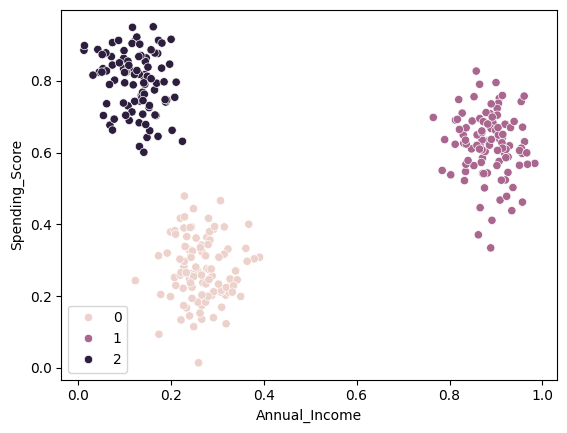

In [30]:
sns.scatterplot(data=pd.DataFrame(X_test_scaled,columns = X_test.columns),x="Annual_Income",y="Spending_Score", hue=y_pred)
plt.show() # data aslında X_test_scaled ama numpy array olduğu için biz data frame e çevirip vermiş olduk.

In [31]:
!pip install kneed

In [32]:
from kneed import KneeLocator

In [33]:
# biz wcss yine hesaplıyoruz sonra bu wcss kneelocator a veriyoruz kneelocator da kaçıncıda kırıldığını matematiksel olarak hesaplar.

In [36]:
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing") # convex ve concav bizim wcss grafikte ki durumu direction da aşağı doğru mu düşüyor düşüyorsa decreasing çıkıyorsa yukarı increasing

In [37]:
kl.elbow

np.int64(3)

In [39]:
from sklearn.metrics import silhouette_score # modelin başarısını ölçmek için kullanırız.

In [41]:
silhoutte_scores = [] # silhouette score başarısını ölçmek için minumum 2 clusterdan başlaması gerek
for k in range(2,11):
  kmeans = KMeans(n_clusters=k , init="k-means++")
  kmeans.fit(X_train_scaled)
  score = silhouette_score(X_train_scaled,kmeans.labels_)
  silhoutte_scores.append(score)

In [43]:
silhoutte_scores

[np.float64(0.4808525318845209),
 np.float64(0.7856941696336582),
 np.float64(0.6400208011797931),
 np.float64(0.5379176436475993),
 np.float64(0.3943382067195667),
 np.float64(0.38202340601180573),
 np.float64(0.36764872245330266),
 np.float64(0.3433371482025358),
 np.float64(0.3282276403870318)]

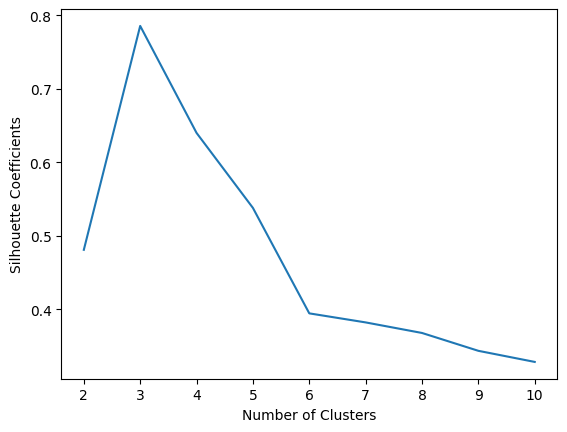

In [44]:
plt.plot(range(2,11),silhoutte_scores)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()  # modelin başarısını burdada 3. de de en yüksek olduğunu görüyoruz bunlar cluster sayısını ölçmek için kullandığımız alternatifler